In [1]:
import pandas as pd

# Load the dataset from the raw folder
df = pd.read_csv("data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Shape of dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Column names and data types
print("\nDataset Info:")
print(df.info())


Shape of dataset: (7043, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16

In [3]:
# Summary statistics for numerical columns
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# Count missing values in each column
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Unique values in "Churn" column (our target variable)
df["Churn"].unique()

# Count how many Yes/No churn customers
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

C:\Users\anura\AppData\Local\Temp\ipykernel_16496\3585420237.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


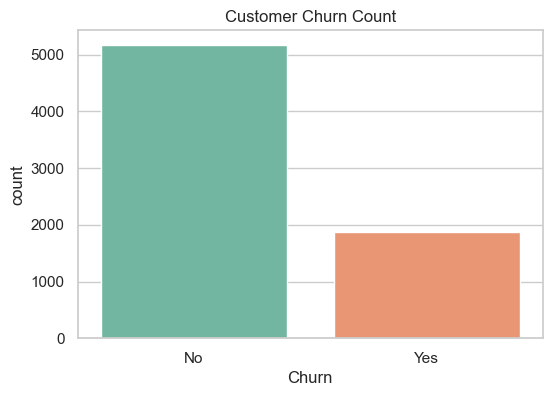

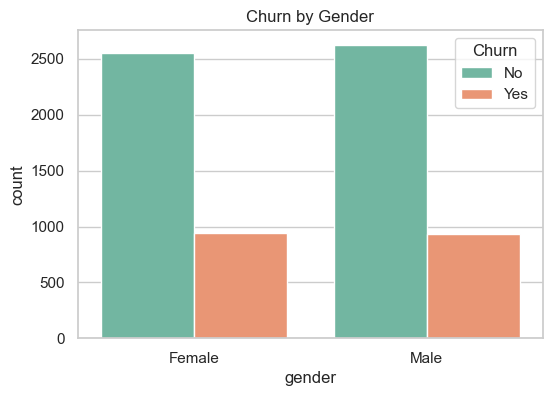

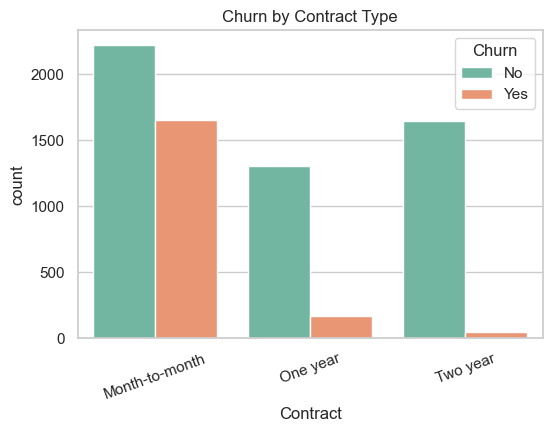

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nice
sns.set(style="whitegrid")

# 1. Countplot of churn
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Customer Churn Count")
plt.show()

# 2. Churn by gender
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="Churn", data=df, palette="Set2")
plt.title("Churn by Gender")
plt.show()

# 3. Churn by contract type
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2")
plt.title("Churn by Contract Type")
plt.xticks(rotation=20)
plt.show()


In [7]:
# Convert TotalCharges to numeric (errors='coerce' will turn bad values into NaN)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check how many became NaN
print("Missing TotalCharges:", df["TotalCharges"].isnull().sum())

# Drop rows with missing TotalCharges
df = df.dropna(subset=["TotalCharges"])

# Verify
df.info()


Missing TotalCharges: 11
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Apply to all categorical columns
for col in df.select_dtypes(include=["object"]).columns:
    if col != "customerID":   # don't encode customer ID
        df[col] = le.fit_transform(df[col])

# Check result
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [9]:
# Features = all columns except customerID and Churn
X = df.drop(["customerID", "Churn"], axis=1)

# Target = Churn (0 = No, 1 = Yes)
y = df["Churn"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (7032, 19)
Target shape: (7032,)


In [10]:
from sklearn.model_selection import train_test_split

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (5625, 19) (5625,)
Test set: (1407, 19) (1407,)


In [12]:
from sklearn.linear_model import LogisticRegression

# Build model
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)



LogisticRegression(max_iter=5000)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Build pipeline: scale data + logistic regression
log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Train
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7938877043354655

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Build and train model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7874911158493249


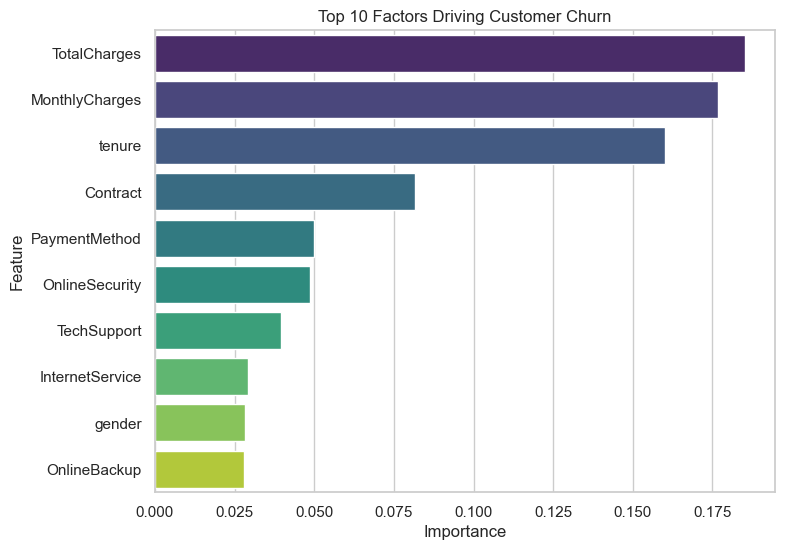

In [17]:
import numpy as np

# Get feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 10 features
# Plot top 10 features properly
plt.figure(figsize=(8,6))
sns.barplot(
    x=importances[indices[:10]], 
    y=X.columns[indices[:10]], 
    hue=X.columns[indices[:10]],   # added hue
    dodge=False, legend=False, 
    palette="viridis"
)
plt.title("Top 10 Factors Driving Customer Churn")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [18]:
# Save processed data for dashboard use
df.to_csv("data/processed/telco_churn_cleaned.csv", index=False)
print("✅ Cleaned dataset saved for dashboard.")


✅ Cleaned dataset saved for dashboard.
